✅ Question 1: What is Anomaly Detection? Explain its types with examples.

Anomaly Detection is the process of identifying rare or unusual patterns in data that do not conform to expected behaviour. These anomalies often indicate critical incidents such as fraud, system failure, cyber-attacks, or data quality issues.

| Type                   | Description                                                      | Example                                                                                      |
| ---------------------- | ---------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Point Anomaly**      | A single data point is significantly different from others       | A normal heart rate is 70–100 bpm. A sudden recorded value of **200 bpm** is a point anomaly |
| **Contextual Anomaly** | A data point is abnormal *within a specific context*             | Temperature of **30°C** is normal in summer but abnormal in winter                           |
| **Collective Anomaly** | A group of points is anomalous even if individual points are not | Several credit card purchases in multiple countries **within minutes**                       |


✅ Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor

| Algorithm            | Approach                                              | Best Use Cases                                 | Pros                           | Cons                                                |
| -------------------- | ----------------------------------------------------- | ---------------------------------------------- | ------------------------------ | --------------------------------------------------- |
| **Isolation Forest** | Random partitions isolate anomalies quicker           | High-dimensional numeric data, fraud detection | Fast, scalable                 | Does not work well with clusters of varying density |
| **DBSCAN**           | Density-based clustering detects low-density outliers | Spatial data, irregular shapes                 | No need for number of clusters | Sensitive to parameters (eps, minPts)               |
| **LOF**              | Measures local density deviation of each point        | When anomalies are locally scattered           | Good for varying densities     | Expensive on large datasets                         |


✅ Question 3: Key components of a Time Series

| Component          | Meaning                                       | Example                                             |
| ------------------ | --------------------------------------------- | --------------------------------------------------- |
| **Trend**          | Long-term increase/decrease                   | Annual increase in the number of airline passengers |
| **Seasonality**    | Repeated pattern in fixed intervals           | Higher electricity usage in evenings daily          |
| **Cyclic**         | Long-term oscillations without a fixed period | Economic cycles (growth → recession)                |
| **Residual/Noise** | Random variations                             | Sudden traffic spikes due to accidents              |


✅ Question 4: Stationarity in Time Series

A stationary series has constant mean, variance, and covariance over time (no trend/seasonality).

✔ How to Test Stationarity:

ADF Test (Augmented Dickey-Fuller)

Visual inspection (trend/seasonality present?)

Rolling mean & variance plots

✔ How to Transform Non-Stationary Series:

Differencing (e.g., y(t) – y(t−1))

Log Transform (reduces variance)

Seasonal Differencing

Detrending (remove trend)

Decomposition

✅ Question 5: Difference between AR, MA, ARIMA, SARIMA, SARIMAX

| Model       | Full Form                   | Structure                  | Handles                | Usage                           |
| ----------- | --------------------------- | -------------------------- | ---------------------- | ------------------------------- |
| **AR**      | Auto-Regressive             | Past values predict future | Trends only            | Stock price forecasting         |
| **MA**      | Moving Average              | Past errors predict future | Noise patterns         | Short-term forecasting          |
| **ARIMA**   | AR + I + MA                 | Includes differencing      | Trend (no seasonality) | Sales without seasonal patterns |
| **SARIMA**  | Seasonal ARIMA              | Adds seasonal terms        | Trend + Seasonality    | Airline passengers              |
| **SARIMAX** | SARIMA + exogenous features | Additional predictors      | Weather, holidays etc. | Energy demand, traffic          |


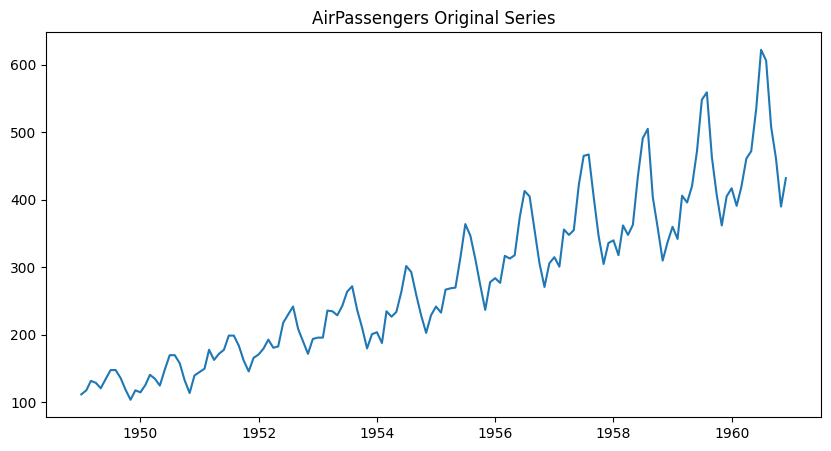

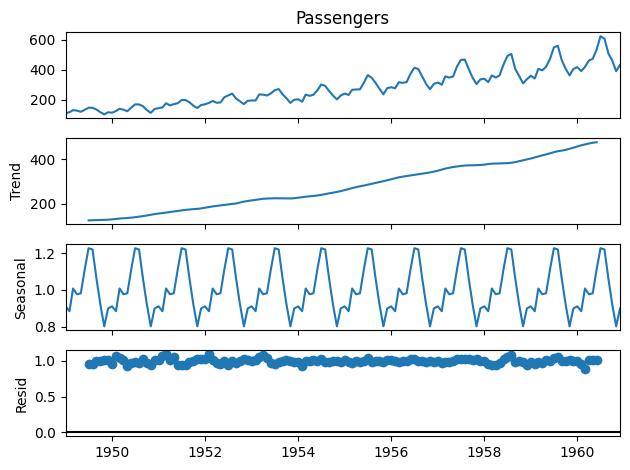

In [3]:
#✅ Question 6: Load & Decompose Time Series (AirPassengers)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset # Corrected import

# Load dataset
# data = airpassengers.load_pandas().data # Original line causing error
data = get_rdataset('AirPassengers', 'datasets').data # Corrected way to load AirPassengers

# Correctly convert the 'time' column (float representing year + fractional month) to datetime
data['year'] = data['time'].apply(lambda x: int(x))
data['month'] = data['time'].apply(lambda x: int(round((x - int(x)) * 12)) + 1)
data['Month'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str), format='%Y-%m')

data.set_index('Month', inplace=True)
data.rename(columns={'value': 'Passengers'}, inplace=True) # Rename 'value' to 'Passengers' for consistency

# Plot original
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'])
plt.title("AirPassengers Original Series")
plt.show()

# Decomposition
decomp = seasonal_decompose(data['Passengers'], model='multiplicative')
decomp.plot()
plt.show()

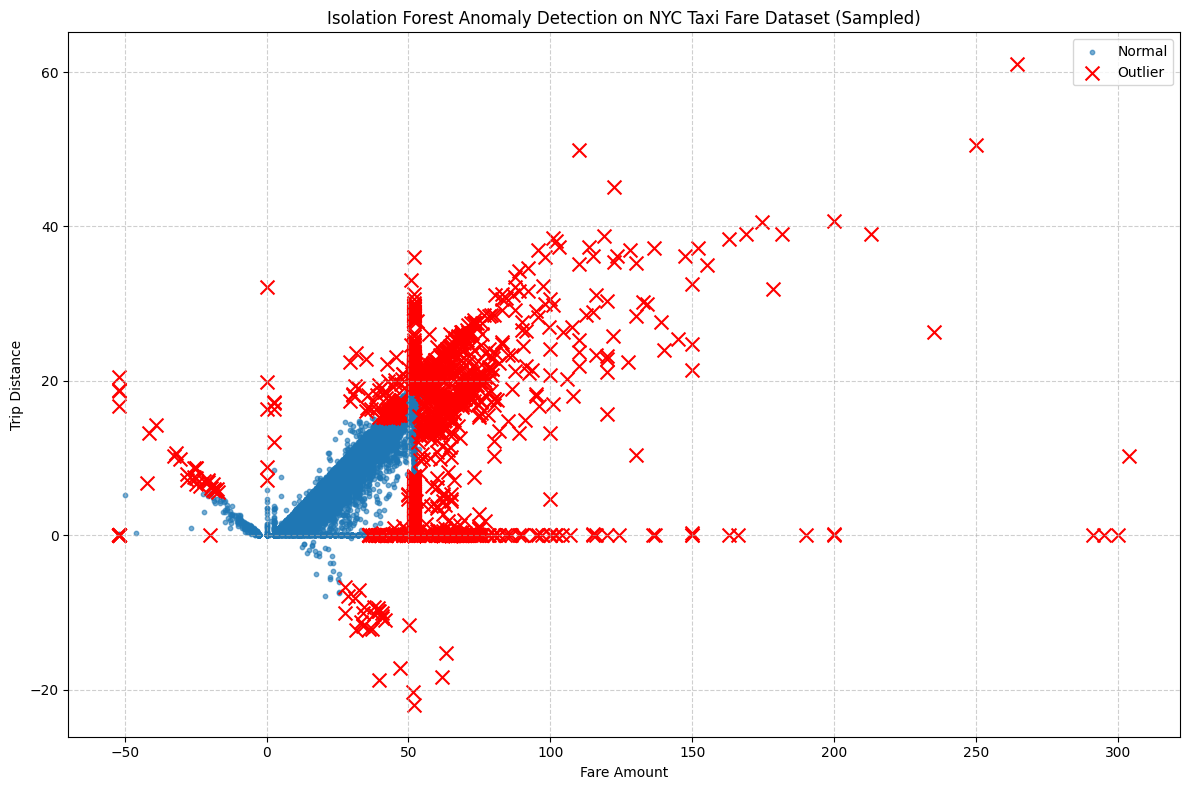


Anomaly distribution:
anomaly
 1    98003
-1     1997
Name: count, dtype: int64


In [2]:
# ✅ Question 7: Isolation Forest on NYC Taxi Fare Dataset

import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Example dataset
# Added low_memory=False to address DtypeWarning and ensure proper loading for large files.
df = pd.read_csv("/content/data.csv", low_memory=False)

# Due to the large size of the dataset and potential for long execution times,
# we will sample a subset of the data for faster anomaly detection.
# If you want to run on the full dataset, remove or comment out the sampling line.
sample_size = 100000
if len(df) > sample_size:
    df_sampled = df.sample(n=sample_size, random_state=42).copy()
else:
    df_sampled = df.copy()

# Select features for anomaly detection
X = df_sampled[['fare_amount', 'trip_distance']]

# Drop rows with NaN values in the selected features, as IsolationForest cannot handle them.
X_cleaned = X.dropna()

# Align the sampled DataFrame with the cleaned features
df_final = df_sampled.loc[X_cleaned.index].copy()

# Initialize and train Isolation Forest model
# Added random_state for reproducibility
# contamination is the proportion of outliers in the data set.
model = IsolationForest(contamination=0.02, random_state=42)
df_final['anomaly'] = model.fit_predict(X_cleaned)

# Separate normal and outlier points
normal = df_final[df_final['anomaly'] == 1]
outliers = df_final[df_final['anomaly'] == -1]

# Plot the results
plt.figure(figsize=(12,8)) # Increased figure size for better visualization
plt.scatter(normal['fare_amount'], normal['trip_distance'], s=10, alpha=0.6, label='Normal') # Added s for size and alpha for density
plt.scatter(outliers['fare_amount'], outliers['trip_distance'], marker='x', s=100, color='red', label='Outlier') # Emphasize outliers
plt.title("Isolation Forest Anomaly Detection on NYC Taxi Fare Dataset (Sampled)")
plt.xlabel("Fare Amount") # More descriptive label
plt.ylabel("Trip Distance") # More descriptive label
plt.legend() # Show legend
plt.grid(True, linestyle='--', alpha=0.6) # Add grid for readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

# Display value counts of anomalies
print("\nAnomaly distribution:")
print(df_final['anomaly'].value_counts())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


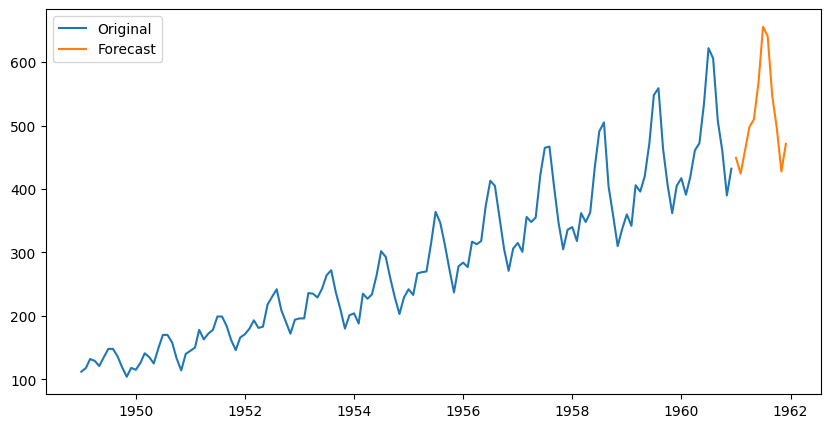

In [4]:
#✅ Question 8: SARIMA Forecasting for next 12 months

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

forecast = result.forecast(steps=12)

plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


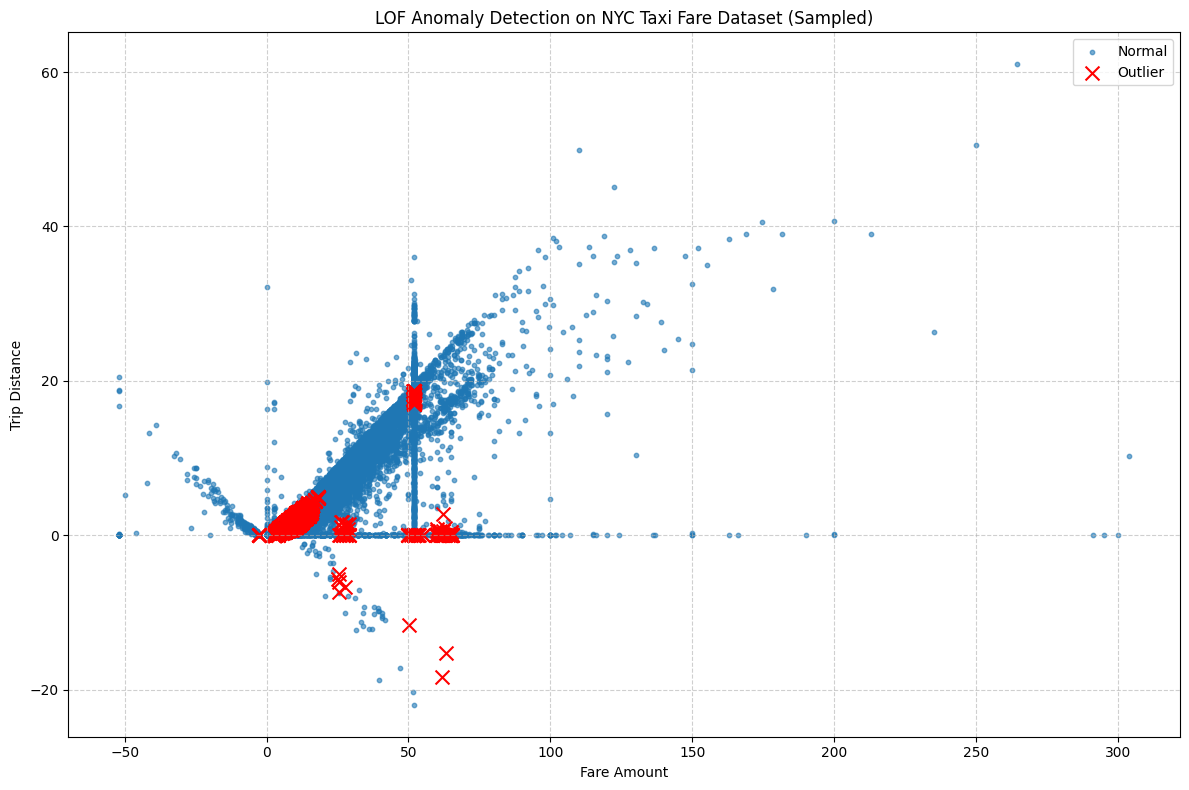


Anomaly distribution (LOF):
lofanomaly
 1    95280
-1     4720
Name: count, dtype: int64


In [4]:
# ✅ Question 9: LOF for Anomaly Detection

from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Ensure X_cleaned and df_final are available from Question 7's execution
# If Question 7 was not run, these variables might not exist or be incorrectly sized.
# We will use X_cleaned for prediction and df_final for storing results and plotting.

# Check if X_cleaned is defined and has data
if 'X_cleaned' not in locals() and 'X_cleaned' not in globals():
    print("Error: 'X_cleaned' not found. Please run Question 7 first to generate the sampled dataframes.")
elif X_cleaned.empty:
    print("Error: 'X_cleaned' is empty. Cannot perform LOF.")
else:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    # Apply LOF to the cleaned sampled features and assign to df_final
    df_final['lofanomaly'] = lof.fit_predict(X_cleaned)

    # Separate normal and outlier points from df_final
    normal = df_final[df_final['lofanomaly'] == 1]
    outliers = df_final[df_final['lofanomaly'] == -1]

    plt.figure(figsize=(12,8)) # Increased figure size for better visualization
    plt.scatter(normal['fare_amount'], normal['trip_distance'], s=10, alpha=0.6, label='Normal')
    plt.scatter(outliers['fare_amount'], outliers['trip_distance'], marker='x', s=100, color='red', label='Outlier')
    plt.title("LOF Anomaly Detection on NYC Taxi Fare Dataset (Sampled)")
    plt.xlabel("Fare Amount")
    plt.ylabel("Trip Distance")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Display value counts of anomalies
    print("\nAnomaly distribution (LOF):")
    print(df_final['lofanomaly'].value_counts())

✅ Question 10: Real-time Workflow for Power Grid Monitoring

ANSWER:

🔹 Anomaly Detection in Streaming Data

->Use Isolation Forest or LOF over sliding windows

->Detect sudden spikes/drops in energy usage

->Real-time system using Apache Kafka / Spark Streaming

🔹 Short-Term Forecasting Model

->SARIMAX

->Uses exogenous features: weather, region, time of day

->Helps predict next few hours accurately

🔹 Validation & Monitoring

->Track metrics: RMSE, MAPE

->Retrain model periodically as distribution drifts

->Alert system if predictions deviate > threshold

🔹 Business Benefits

->Prevent equipment overload & blackouts

->Optimize power generation = cost savings

->Early warning for meter tampering or malfunction

->Better demand planning across regions